# 🎲 A Pholosophical Change in Perspective

Before this point in time, we were used to discuss only about the ***ways*** to calculate the moving average. Now, it is the time to **forecast** points.

For that, we will build up from what we have learnt so far *(EWMA)* and **use it instead of** calculating moving average but **to forecast**. That is gonna be awsome — let's do that!

### Using new notations
Till now we have:

# $$ \text{EWMA} = \alpha x_t + (1 - \alpha)\bar x_{t - 1}$$

###### 

Just a little change as we are ***now forecasting***:

# $$ \hat y_t = \alpha y_t + (1 - \alpha)\hat y_{t - 1}$$

###### 

The ***official*** forecasting model:

# $$ \hat y_{t+1 | t} = \alpha y_t + (1 - \alpha)\hat y_{t | t - 1}$$

- $\hat y_{t+1 | t}:$ The "*future predicted*" value of `t + 1` point ***given*** the current point `t`
- $\hat y_{t | t - 1}:$ The "*current predictied*" value of  `t` ***given*** the previous value of `t - 1`

This ↑ one, I know is not clear to me as well at this point in time `t` 😅 but that will get clear as we will move forward.

###### 

Express our model **in the component** form:

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t $$
Where, <br>
$h=1,2,3 ...$ 
<br>Meaning `t + h` th forecast in the future. Recall the `h` value from previous notebooks. `1. Timeseries Basics → 4. Types of tasks → 2.1 Incremental Forecast`

#### 2️⃣ Smoothing Equation
# $$l_t = \alpha y_t + (1 - \alpha)l_{t - 1} $$

Which, <br>
is just the plugging the value of $l_t$ from 2️⃣ equation to the 1️⃣ equation. Might **not** make any sense now but here we are setting **THE LEVEL** which later add some other elements and building such habit will result smoother later.

> **NOTE / NOTICE** that, the original indices are back when we **represent the equation** in the form of the component form ie. instead of writing $l_{t + 1 | t}$ we've just written $l_t$ as before under the section: "*Just a little change as we are now forecasting*" equation in this notebook.

# $l_t$ is the Level.
This is the first time that we have been introduced in the ***jargons*** of the time-series. It is simple for now but then it will be more complex. Don't worry we will get there easily.

The term **level** is first appeared at this path: `2. Exponential Smoothing and ETS → 1. Moving and Exp` where we discussed that the level is the *constant* values around which the value of the time-series fluctuates. 

> Thus, **the level** can be thought of as the moving average which represents the mean of the fluctuations in that period.

Here, in thsis simple SES, we will **only be able to predict** the mean fluctuation of the 1 step further in time because the value of `h` 2, 3, 4... will be just the same.

###### 

## 👨‍💻 Great Goin'
Let's now have a look at some code — and this time we will be using `statsmodels`

#### A Bit of Skeleton With Statsmodels
Till now Aayush, you have worked with `sklearn` and used fit and predict. Here, the flow changes a bit. Let's have a look.

```python
# Model initialization 
model = someModel(param_1=0.1, param_2="euclidean") # sklearn
model = someModel(data) # statsmodels

# Fitting
model.fit(data) # sklearn
model.fit(param_1=0.1, param_2="euclidean") # statsmodels
```
See? Here in `statsmodels` the flow is a bit flipped.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This is the model that we are going to work with
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [168]:
passengers = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)

In [86]:
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
ses = SimpleExpSmoothing(passengers)

C:\Users\Aayush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Aayush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


So, you **see the warnings** right? They are telling that "the model doesn't know that what frequency is there in the data" meaning, is our data spread out monthly? weekly? yearly? 3 yearly? what?

Thus, it *by default* takes the monthly. But in-case of other frequancy that we have in the data, we will need to pass them in the parameter.

In [87]:
# See that the frequency is NONE
passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [169]:
# You can try setting "D", "Y" etc... but that will result an error as it will
# check that `really` the frequancy is there or not, so better to use the  correct one
passengers.index.freq = "MS"

Here `MS` means **Month Start** and the `M` means **Month End**. So, keep that in mind. Or just refer **your** [Time in Pandas](https://github.com/AayushSameerShah/Pandas_Book/tree/main/2.%20Pandas/6.%20TIME) repository!

In [170]:
# Again need to put the data in to reflect the `freq` change
ses = SimpleExpSmoothing(passengers,
                        initialization_method="legacy-heuristic")

Yeah, we are using the `legacy-heuristic` to make it work same as it did in the old versions.

Remember to **give only 1D data** meaning, there should only be single thing to forecast. As here we only have the passengers as the input and to be the thing to be predicted. Otherwise it will give:
```python
ValueError: endog is required to have ndim 1 but has ndim 2
```

In [171]:
alpha = 0.2
result = ses.fit(smoothing_level=alpha, optimized=False)
result

The `optimized=False` is because here the $\alpha$ will stay **constant** and will **not adujust** to minimize the lose function and minimize the error. So, it will work as we have understood in the theory.

The possible things are:

<img src="../images/ses_attrs.PNG" height=500 width=600>

Thus here, we have **2** things useful to us:
1. `predict`: Which takes input as **start** and **end** date so we can get any forecast for any date we want.
2. `forecast`: Which does *actual* forecast for `h` steps given

### `1.` Predict 

In [173]:
start =  passengers.index[0]
till =  passengers.index[-1]
print("START: ", start)
print("TILL: ", till)
passengers['SES - Pred'] = result.predict(start, till)

START:  1949-01-01 00:00:00
TILL:  1960-12-01 00:00:00


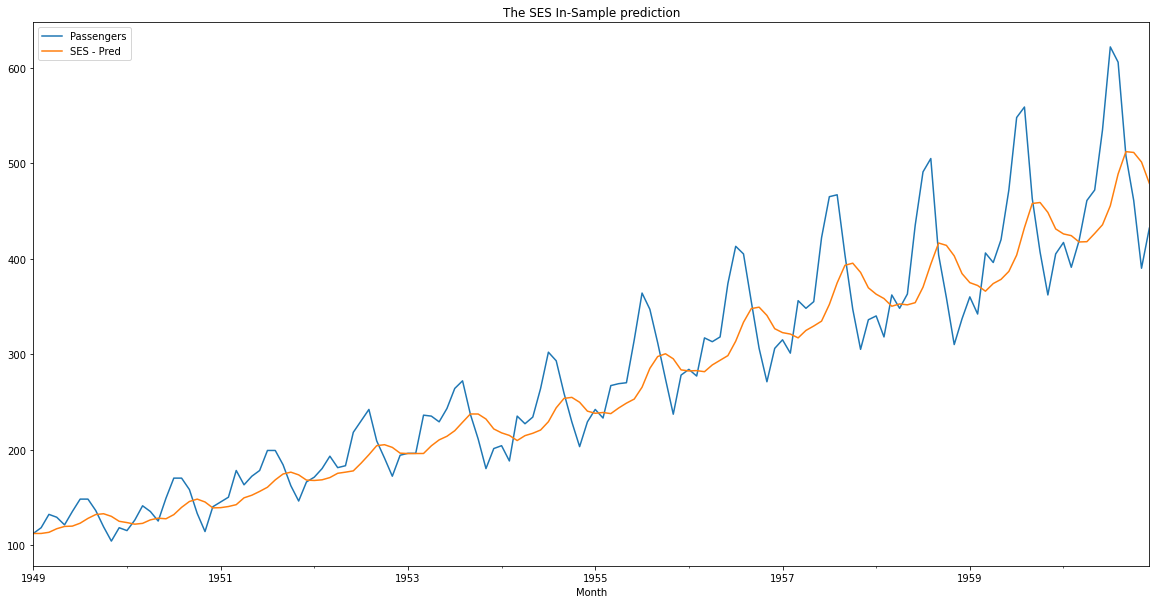

In [174]:
passengers.plot()
plt.title("The SES In-Sample prediction");

Looks like the result that we've got with EWMA, right? <br>
Let's see how EWMA results are...

In [175]:
passengers["EWMA"] = passengers["Passengers"].ewm(alpha=alpha, adjust=False).mean()

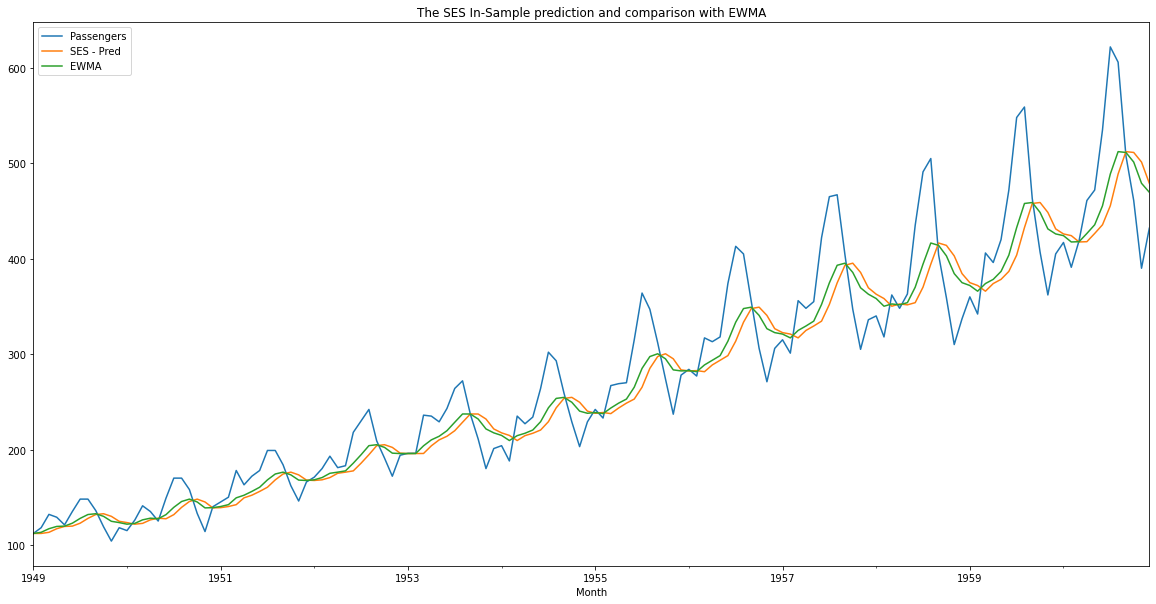

In [176]:
passengers.plot()
plt.title("The SES In-Sample prediction and comparison with EWMA");

We can see that the results of **EWMA** and **SES** are exactly the same but SES is *one step lagging behind*.

In [105]:
# Just the styling stuff... don't worry
def styling_specific_cell(df, rows, cols):
    df_styler = pd.DataFrame('', index=df.index, columns=df.columns)
    df_styler.iloc[rows, cols] = 'background-color: cyan'
    return df_styler
    
passengers.head().style.apply(styling_specific_cell, rows=[0, 1], cols=[1, 1], axis=None)

,Passengers,SES - Pred,EWMA
Month,,,
1949-01-01 00:00:00,112,112.000000,112.000000
1949-02-01 00:00:00,118,112.000000,113.200000
1949-03-01 00:00:00,132,113.200000,116.960000
1949-04-01 00:00:00,129,116.960000,119.368000
1949-05-01 00:00:00,121,119.368000,119.694400


See, there? The first 2 values in the SES column gets repeated. The reason that the author gives is that: 

> *"We are treating this as the forecasting model rather than the EWMA model thus here the forecast for the **2nd** day will be the forecast for the **1st** day as before the day 2nd we only had day 1 and the exp mean of single number is the number itself. Then after the 2nd day, for the **3rd**, **4th** ... we will get the result as expected. Thus, it lags behind one day."*

### `2.` Forecast
Let's try 3 months ahead in time

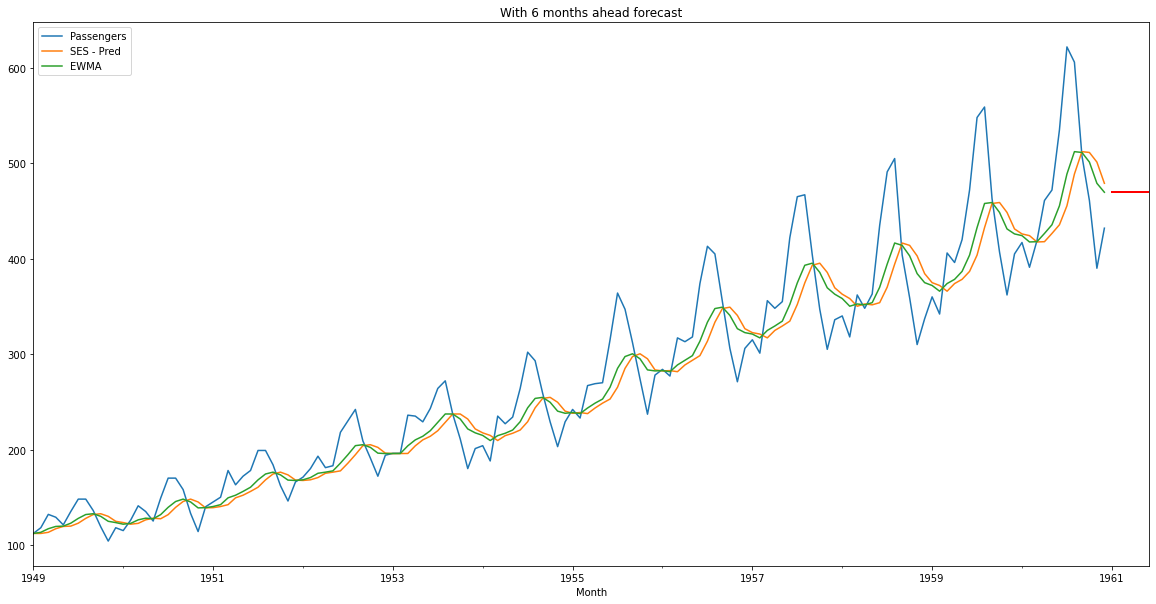

In [177]:
passengers.plot()
result.forecast(6).plot(color='r', lw=2)
plt.title("With 6 months ahead forecast");

To view it better...

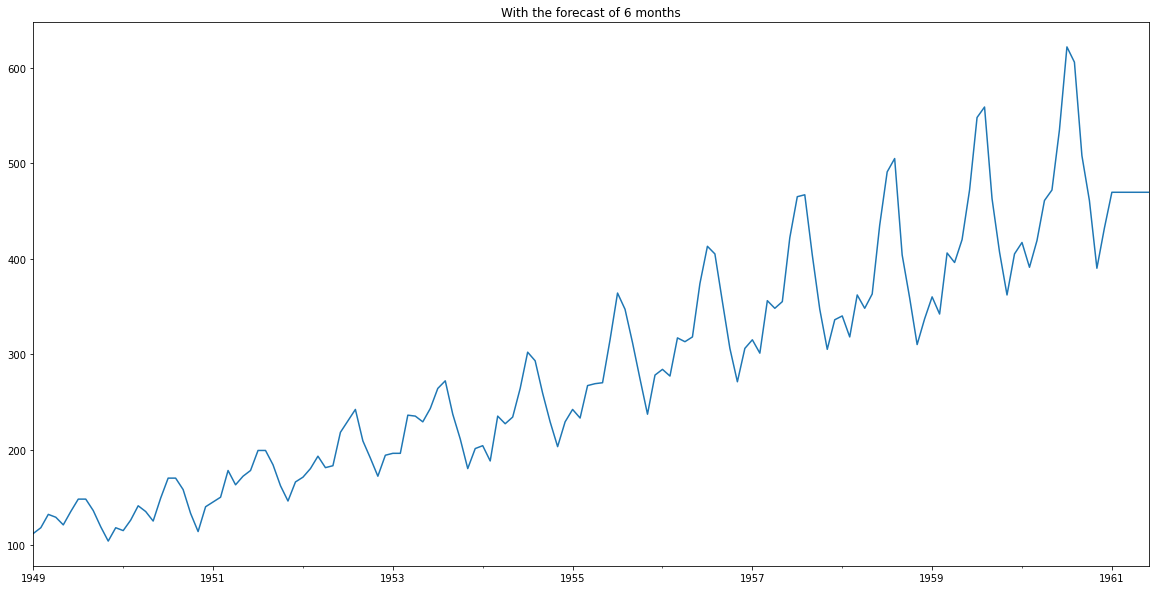

In [180]:
forecast_passengers = pd.concat([passengers, pd.DataFrame(result.forecast(6), columns=["Passengers"])])
forecast_passengers["Passengers"].plot()
plt.title("With the forecast of 6 months");

Yay! Congratulations! 🎉 <br>
For the first time we have ***forecast*** (ed) something!!! Simple but the first step in the future!

### Taking this as the ML approach

See, till here we have taken the **manual** alpha and then based on that `0.2` we have forecast the new points. But, see the alpha might not be the proper one... let's see how it affects if **we would have taken `optimize=True`**.

###### 

#### 😁 The simulation fun

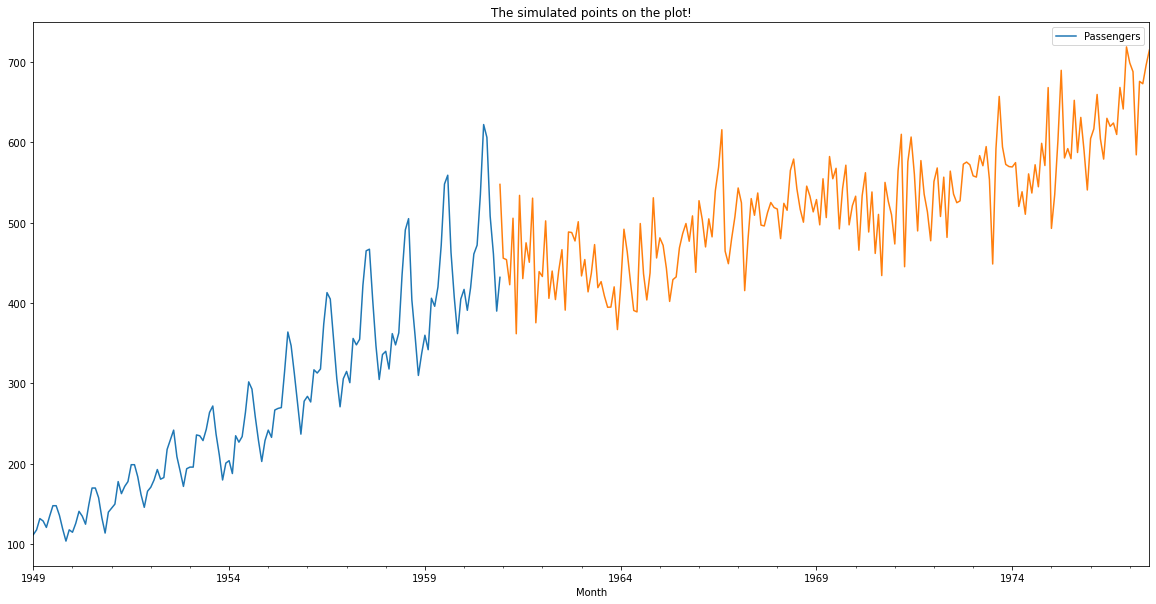

In [77]:
# This will generate the random samples (different each time)
simulation = result.simulate(200, random_state=1)

# Setting the new date after the last date in the data
simulated_idx = pd.date_range(passengers.index[-1], periods=200, freq="MS")
simulation.index = simulated_idx

# Plotting with different colors
plt.rcParams['figure.figsize'] = (20, 10)
passengers.plot()
simulation.plot()

plt.title("The simulated points on the plot!");

See that, those are **not the predictions** or the forecating, they are just the ***synthetic points*** generated by our model. As said - just for fun.